**RUL Project from kaggle dataset:**
https://www.kaggle.com/datasets/behrad3d/nasa-cmaps

**Notebook references:**
https://www.kaggle.com/code/carlkirstein/predictive-maintenance-nasa-turbofan-regression/notebook

**differences between the two:**
* they removed features based on statistical univariate test
* they added a threshold on the RUL datapoints -> set max RUL at 125, anything above is set as 125
* considered both standardscaler and min_max scaler for knn


In [2]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import classification_report,confusion_matrix
import time
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

In [3]:
pd.set_option('display.max_columns', None) 
pd.set_option('display.max_rows', 500) 
pd.set_option('display.expand_frame_repr', False)

In [11]:
index_names = ['engine', 'cycle']
setting_names = ['setting_1', 'setting_2', 'setting_3']
sensor_names=[ "(Fan inlet temperature) (◦R)",
"(LPC outlet temperature) (◦R)",
"(HPC outlet temperature) (◦R)",
"(LPT outlet temperature) (◦R)",
"(Fan inlet Pressure) (psia)",
"(bypass-duct pressure) (psia)",
"(HPC outlet pressure) (psia)",
"(Physical fan speed) (rpm)",
"(Physical core speed) (rpm)",
"(Engine pressure ratio(P50/P2)",
"(HPC outlet Static pressure) (psia)",
"(Ratio of fuel flow to Ps30) (pps/psia)",
"(Corrected fan speed) (rpm)",
"(Corrected core speed) (rpm)",
"(Bypass Ratio) ",
"(Burner fuel-air ratio)",
"(Bleed Enthalpy)",
"(Required fan speed)",
"(Required fan conversion speed)",
"(High-pressure turbines Cool air flow)",
"(Low-pressure turbines Cool air flow)" ]
col_names = index_names + setting_names + sensor_names


dfx= pd.read_csv('test_FD001.txt', sep='\s+', header=None, names=col_names)
dfy = pd.read_csv('RUL_FD001.txt', sep='\s+', header=None, names=['RUL'])

dfxx= pd.read_csv('test_FD002.txt', sep='\s+', header=None, names=col_names)
dfyy= pd.read_csv('RUL_FD002.txt', sep='\s+', header=None, names=['RUL'])

dfxxx= pd.read_csv('test_FD003.txt', sep='\s+', header=None, names=col_names)
dfyyy = pd.read_csv('RUL_FD003.txt', sep='\s+', header=None, names=['RUL'])

dfxxxx= pd.read_csv('test_FD004.txt', sep='\s+', header=None, names=col_names)
dfyyyy = pd.read_csv('RUL_FD004.txt', sep='\s+', header=None, names=['RUL'])




# dfx.to_csv('EngineExecute.csv', index=False)

# Concatenate the two DataFrames
# x = pd.concat([dfx1, dfy], axis=1)
# output = x.merge(dfx, how='left', on=['engine', 'cycle']).drop(columns=['cycle'])
# print(dfx.head(100))
# dfxx = pd.read_csv(('test_FD002.txt'), sep='\s+', header=None, names=col_names)
# dfyy = pd.read_csv(('RUL_FD002.txt'), sep='\s+', header=None, names=['RUL'])
# dff = pd.concat([dfxx, dfyy], axis=1)
# dfxxx = pd.read_csv(('test_FD003.txt'), sep='\s+', header=None, names=col_names)
# dfyyy = pd.read_csv(('RUL_FD003.txt'), sep='\s+', header=None, names=['RUL'])
# dfff = pd.concat([dfxxx, dfyyy], axis=1)
# dfxxxx = pd.read_csv(('test_FD004.txt'), sep='\s+', header=None, names=col_names)
# dfyyyy = pd.read_csv(('RUL_FD004.txt'), sep='\s+', header=None, names=['RUL'])
# dffff = pd.concat([dfxxxx, dfyyyy], axis=1)

# combined_df = pd.concat([df, dff, dfff, dffff], axis=0, ignore_index=True)
# combined_df = df



# combined_df.isnull().sum()
# combined_df.dropna(inplace=True)
# combined_df.drop(columns = ["(Corrected core speed) (rpm)"],axis=1,inplace=True)
# sens_const_values = []
# for feature in list(setting_names + sensor_names):
#     try:
#         if combined_df[feature].min()==combined_df[feature].max():
#             sens_const_values.append(feature)
#     except:
#         pass

# combined_df.drop(sens_const_values,axis=1,inplace=True)
# import numpy as np

# # Find constant columns (columns with only a single unique value)
# constant_columns = combined_df.columns[combined_df.nunique() == 1]

# # Find columns with no predictive power (e.g., all NaN or all zeros)
# no_predictive_power_columns = combined_df.columns[np.all(np.isnan(combined_df) | (combined_df == 0), axis=0)]

# # Combine the columns to drop
# columns_to_drop = list(constant_columns) + list(no_predictive_power_columns)

# # Drop the columns from the combined_df dataframe
# combined_df = combined_df.drop(columns=columns_to_drop)



In [12]:
x_test_cycle = dfx.groupby(['engine']).agg({'cycle':'max'})
x_test_cycle.rename(columns={'cycle':'life span'},inplace=True)
x_test_max = dfx.merge(x_test_cycle,how='left',on=['engine'])
x_test_max = x_test_max[(x_test_max['cycle']==x_test_max['life span'])]
x_test_max.drop(['life span'],axis=1,inplace=True)
x_test_max.reset_index(drop=True, inplace=True)
combined_df1 = pd.concat([x_test_max, dfy], axis=1)

x_test_cycle = dfxx.groupby(['engine']).agg({'cycle':'max'})
x_test_cycle.rename(columns={'cycle':'life span'},inplace=True)
x_test_max = dfxx.merge(x_test_cycle,how='left',on=['engine'])
x_test_max = x_test_max[(x_test_max['cycle']==x_test_max['life span'])]
x_test_max.drop(['life span'],axis=1,inplace=True)
x_test_max.reset_index(drop=True, inplace=True)
combined_df2 = pd.concat([x_test_max, dfyy], axis=1)

x_test_cycle = dfxxx.groupby(['engine']).agg({'cycle':'max'})
x_test_cycle.rename(columns={'cycle':'life span'},inplace=True)
x_test_max = dfxxx.merge(x_test_cycle,how='left',on=['engine'])
x_test_max = x_test_max[(x_test_max['cycle']==x_test_max['life span'])]
x_test_max.drop(['life span'],axis=1,inplace=True)
x_test_max.reset_index(drop=True, inplace=True)
combined_df3 = pd.concat([x_test_max, dfyyy], axis=1)

x_test_cycle = dfxxxx.groupby(['engine']).agg({'cycle':'max'})
x_test_cycle.rename(columns={'cycle':'life span'},inplace=True)
x_test_max = dfxxxx.merge(x_test_cycle,how='left',on=['engine'])
x_test_max = x_test_max[(x_test_max['cycle']==x_test_max['life span'])]
x_test_max.drop(['life span'],axis=1,inplace=True)
x_test_max.reset_index(drop=True, inplace=True)
combined_df4 = pd.concat([x_test_max, dfyyyy], axis=1)

dff = pd.concat([combined_df1, combined_df2, combined_df3, combined_df4], axis=0, ignore_index=True)
dff.to_csv('Engine.csv', index=False)


# combined_df2.to_csv('EngineTesting.csv', index=False)
# dfx.to_csv('EngineExe.csv', index=False)
# dfxxx = pd.read_csv(('test_FD003.txt'), sep='\s+', header=None, names=col_names)
# dfyyy = pd.read_csv(('RUL_FD003.txt'), sep='\s+', header=None, names=['RUL'])
# dfff = pd.concat([dfxxx, dfyyy], axis=1)

In [ ]:
combined_df.head(500)

In [7]:
combined_df.to_csv('Engine.csv', index=False)
test_df = combined_df.sample(150)
test_df.to_csv('EngineTest.csv', index=False)

ValueError: Cannot take a larger sample than population when 'replace=False'

In [6]:
y_test.head()

,RUL
0,112
1,98
2,69
3,82
4,91


In [7]:
x_train.describe(include='all')

,engine,cycle,setting_1,setting_2,setting_3,(Fan inlet temperature) (◦R),(LPC outlet temperature) (◦R),(HPC outlet temperature) (◦R),(LPT outlet temperature) (◦R),(Fan inlet Pressure) (psia),(bypass-duct pressure) (psia),(HPC outlet pressure) (psia),(Physical fan speed) (rpm),(Physical core speed) (rpm),(Engine pressure ratio(P50/P2),(HPC outlet Static pressure) (psia),(Ratio of fuel flow to Ps30) (pps/psia),(Corrected fan speed) (rpm),(Corrected core speed) (rpm),(Bypass Ratio),(Burner fuel-air ratio),(Bleed Enthalpy),(Required fan speed),(Required fan conversion speed),(High-pressure turbines Cool air flow),(Low-pressure turbines Cool air flow)
count,20631.000000,20631.000000,20631.000000,20631.000000,20631.0,2.063100e+04,20631.000000,20631.000000,20631.000000,2.063100e+04,20631.000000,20631.000000,20631.000000,20631.000000,2.063100e+04,20631.000000,20631.000000,20631.000000,20631.000000,20631.000000,2.063100e+04,20631.000000,20631.0,20631.0,20631.000000,20631.000000
mean,51.506568,108.807862,-0.000009,0.000002,100.0,5.186700e+02,642.680934,1590.523119,1408.933782,1.462000e+01,21.609803,553.367711,2388.096652,9065.242941,1.300000e+00,47.541168,521.413470,2388.096152,8143.752722,8.442146,3.000000e-02,393.210654,2388.0,100.0,38.816271,23.289705
std,29.227633,68.880990,0.002187,0.000293,0.0,6.537152e-11,0.500053,6.131150,9.000605,3.394700e-12,0.001389,0.885092,0.070985,22.082880,4.660829e-13,0.267087,0.737553,0.071919,19.076176,0.037505,1.556432e-14,1.548763,0.0,0.0,0.180746,0.108251
min,1.000000,1.000000,-0.008700,-0.000600,100.0,5.186700e+02,641.210000,1571.040000,1382.250000,1.462000e+01,21.600000,549.850000,2387.900000,9021.730000,1.300000e+00,46.850000,518.690000,2387.880000,8099.940000,8.324900,3.000000e-02,388.000000,2388.0,100.0,38.140000,22.894200
25%,26.000000,52.000000,-0.001500,-0.000200,100.0,5.186700e+02,642.325000,1586.260000,1402.360000,1.462000e+01,21.610000,552.810000,2388.050000,9053.100000,1.300000e+00,47.350000,520.960000,2388.040000,8133.245000,8.414900,3.000000e-02,392.000000,2388.0,100.0,38.700000,23.221800
50%,52.000000,104.000000,0.000000,0.000000,100.0,5.186700e+02,642.640000,1590.100000,1408.040000,1.462000e+01,21.610000,553.440000,2388.090000,9060.660000,1.300000e+00,47.510000,521.480000,2388.090000,8140.540000,8.438900,3.000000e-02,393.000000,2388.0,100.0,38.830000,23.297900
75%,77.000000,156.000000,0.001500,0.000300,100.0,5.186700e+02,643.000000,1594.380000,1414.555000,1.462000e+01,21.610000,554.010000,2388.140000,9069.420000,1.300000e+00,47.700000,521.950000,2388.140000,8148.310000,8.465600,3.000000e-02,394.000000,2388.0,100.0,38.950000,23.366800
max,100.000000,362.000000,0.008700,0.000600,100.0,5.186700e+02,644.530000,1616.910000,1441.490000,1.462000e+01,21.610000,556.060000,2388.560000,9244.590000,1.300000e+00,48.530000,523.380000,2388.560000,8293.720000,8.584800,3.000000e-02,400.000000,2388.0,100.0,39.430000,23.618400


**correlation matrix to identify correlated features**

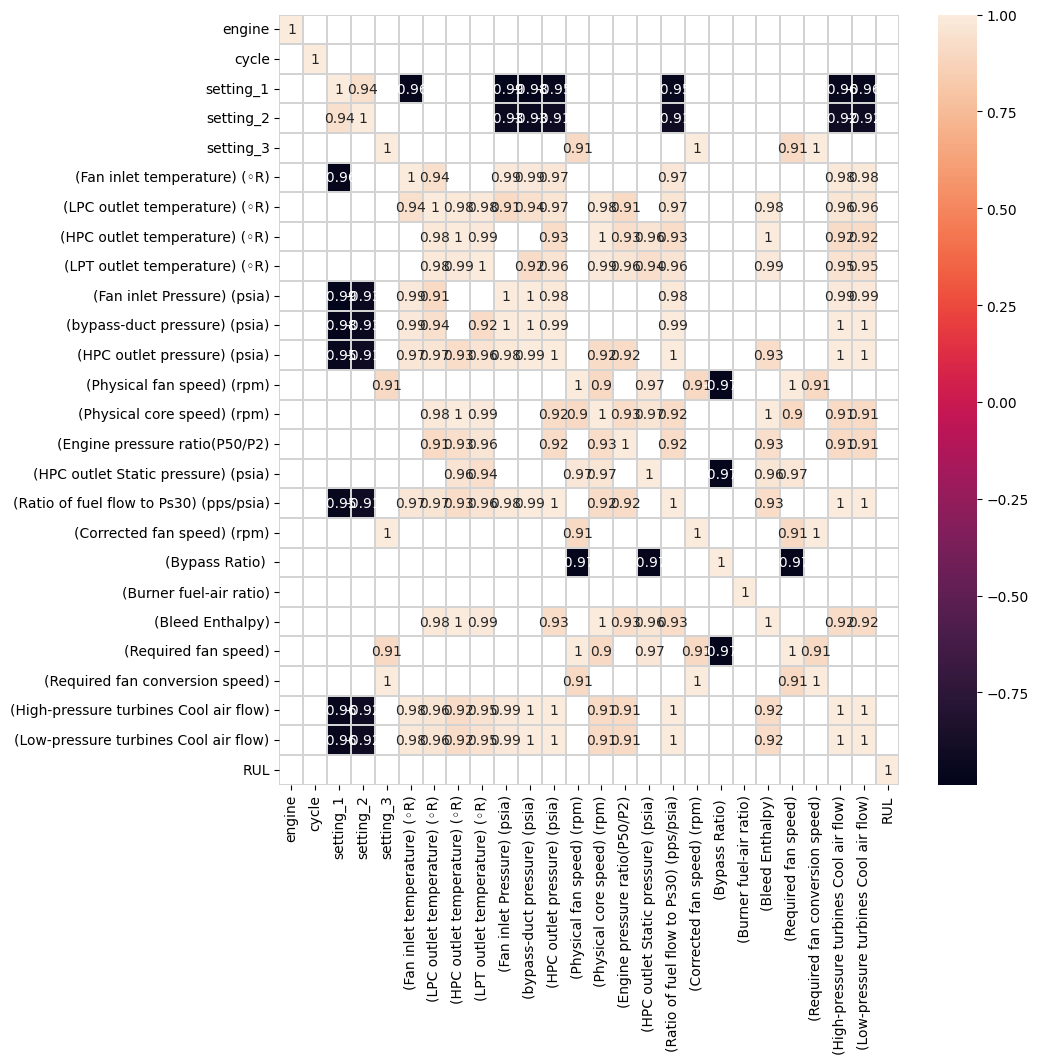

In [14]:
plt.figure(figsize=(10,10))
threshold = 0.9
corr = df.corr()
mask = corr.where((abs(corr) >= threshold)).isna()
sns.heatmap(corr,
            annot=True,
            mask=mask,
            linewidths=0.2, 
            linecolor='lightgrey').set_facecolor('white')

**dropping constant values**

In [7]:
sens_const_values = []
for feature in list(setting_names + sensor_names):
    try:
        if df[feature].min()==df[feature].max():
            sens_const_values.append(feature)
    except:
        pass

print(sens_const_values)
df.drop(sens_const_values,axis=1,inplace=True)


[]


**drop highly correlated columns to avoid multicollinearity**

In [15]:
# df.drop(columns = ["(Corrected core speed) (rpm)"],axis=1,inplace=True)
df.head()

,engine,cycle,setting_1,setting_2,setting_3,(Fan inlet temperature) (◦R),(LPC outlet temperature) (◦R),(HPC outlet temperature) (◦R),(LPT outlet temperature) (◦R),(Fan inlet Pressure) (psia),(bypass-duct pressure) (psia),(HPC outlet pressure) (psia),(Physical fan speed) (rpm),(Physical core speed) (rpm),(Engine pressure ratio(P50/P2),(HPC outlet Static pressure) (psia),(Ratio of fuel flow to Ps30) (pps/psia),(Corrected fan speed) (rpm),(Bypass Ratio),(Burner fuel-air ratio),(Bleed Enthalpy),(Required fan speed),(Required fan conversion speed),(High-pressure turbines Cool air flow),(Low-pressure turbines Cool air flow),RUL
0,1,1,9.9987,0.2502,100.0,489.05,605.03,1497.17,1304.99,10.52,15.49,394.54,2318.96,8763.80,1.26,45.61,371.69,2388.18,8.6476,0.03,369,2319,100.00,28.42,17.1551,18.0
1,1,2,20.0026,0.7000,100.0,491.19,607.82,1481.20,1246.11,9.35,13.66,334.36,2323.95,8713.21,1.08,44.26,315.32,2388.12,9.2405,0.02,364,2324,100.00,24.29,14.8039,79.0
2,1,3,35.0045,0.8400,100.0,449.44,556.00,1359.08,1128.36,5.48,8.00,193.55,2222.67,8340.20,1.02,41.80,183.04,2387.75,9.3472,0.02,333,2223,100.00,14.98,8.9125,106.0
3,1,4,42.0066,0.8410,100.0,445.00,550.17,1349.69,1127.89,3.91,5.71,138.74,2211.58,8313.85,1.02,42.21,130.40,2387.72,9.3961,0.02,332,2212,100.00,10.35,6.4181,110.0
4,1,5,24.9985,0.6213,60.0,462.54,536.72,1253.18,1050.69,7.05,9.03,175.75,1915.10,7997.13,0.94,36.76,164.56,2028.05,10.8682,0.02,305,1915,84.93,14.31,8.5740,15.0


**check for NA values** 

In [17]:
for i in list(df.columns):
    print(i + "  " + str(len(df[df[i].isna()])))

engine  0
cycle  0
setting_1  0
setting_2  0
setting_3  0
(Fan inlet temperature) (◦R)  0
(LPC outlet temperature) (◦R)  0
(HPC outlet temperature) (◦R)  0
(LPT outlet temperature) (◦R)  0
(Fan inlet Pressure) (psia)  0
(bypass-duct pressure) (psia)  0
(HPC outlet pressure) (psia)  0
(Physical fan speed) (rpm)  0
(Physical core speed) (rpm)  0
(Engine pressure ratio(P50/P2)  0
(HPC outlet Static pressure) (psia)  0
(Ratio of fuel flow to Ps30) (pps/psia)  0
(Corrected fan speed) (rpm)  0
(Bypass Ratio)   0
(Burner fuel-air ratio)  0
(Bleed Enthalpy)  0
(Required fan speed)  0
(Required fan conversion speed)  0
(High-pressure turbines Cool air flow)  0
(Low-pressure turbines Cool air flow)  0
RUL  0


**Identify max life of enginer and use to obtain RUL**

In [12]:
y_train = x_train.groupby(['engine']).agg({'cycle':'max'})
y_train.rename(columns={'cycle':'life span'},inplace=True)
y_train

x_train = x_train.merge(y_train,how='left',on=['engine'])
x_train

x_train['RUL']=x_train['life span']-x_train['cycle']
x_train.drop(['life span'],axis=1,inplace=True)

# the RUL prediction is only useful nearer to the end of the engine's life, therefore we put an upper limit on the RUL
# this is a bit sneaky, since it supposes that the test set has RULs of less than this value, the closer you are
# to the true value, the more accurate the model will be
x_train['RUL'][x_train['RUL']>125]=125
x_train

C:\Users\leeee\AppData\Local\Temp/ipykernel_21484/252129712.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_train['RUL'][x_train['RUL']>125]=125


,engine,cycle,setting_1,setting_2,(LPC outlet temperature) (◦R),(HPC outlet temperature) (◦R),(LPT outlet temperature) (◦R),(bypass-duct pressure) (psia),(HPC outlet pressure) (psia),(Physical fan speed) (rpm),(Physical core speed) (rpm),(HPC outlet Static pressure) (psia),(Ratio of fuel flow to Ps30) (pps/psia),(Corrected fan speed) (rpm),(Bypass Ratio),(Bleed Enthalpy),(High-pressure turbines Cool air flow),(Low-pressure turbines Cool air flow),RUL
0,1,1,-0.0007,-0.0004,641.82,1589.70,1400.60,21.61,554.36,2388.06,9046.19,47.47,521.66,2388.02,8.4195,392,39.06,23.4190,125
1,1,2,0.0019,-0.0003,642.15,1591.82,1403.14,21.61,553.75,2388.04,9044.07,47.49,522.28,2388.07,8.4318,392,39.00,23.4236,125
2,1,3,-0.0043,0.0003,642.35,1587.99,1404.20,21.61,554.26,2388.08,9052.94,47.27,522.42,2388.03,8.4178,390,38.95,23.3442,125
3,1,4,0.0007,0.0000,642.35,1582.79,1401.87,21.61,554.45,2388.11,9049.48,47.13,522.86,2388.08,8.3682,392,38.88,23.3739,125
4,1,5,-0.0019,-0.0002,642.37,1582.85,1406.22,21.61,554.00,2388.06,9055.15,47.28,522.19,2388.04,8.4294,393,38.90,23.4044,125
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20626,100,196,-0.0004,-0.0003,643.49,1597.98,1428.63,21.61,551.43,2388.19,9065.52,48.07,519.49,2388.26,8.4956,397,38.49,22.9735,4
20627,100,197,-0.0016,-0.0005,643.54,1604.50,1433.58,21.61,550.86,2388.23,9065.11,48.04,519.68,2388.22,8.5139,395,38.30,23.1594,3
20628,100,198,0.0004,0.0000,643.42,1602.46,1428.18,21.61,550.94,2388.24,9065.90,48.09,520.01,2388.24,8.5646,398,38.44,22.9333,2
20629,100,199,-0.0011,0.0003,643.23,1605.26,1426.53,21.61,550.68,2388.25,9073.72,48.39,519.67,2388.23,8.5389,395,38.29,23.0640,1


In [13]:
# awesome bit of code from https://www.kaggle.com/code/adibouayjan/house-price-step-by-step-modeling

Selected_Features = []
import statsmodels.api as sm

def backward_regression(X, y, initial_list=[], threshold_out=0.05, verbose=True):
    """To select feature with Backward Stepwise Regression 

    Args:
        X -- features values
        y -- target variable
        initial_list -- features header
        threshold_out -- pvalue threshold of features to drop
        verbose -- true to produce lots of logging output

    Returns:
        list of selected features for modeling 
    """
    included = list(X.columns)
    while True:
        changed = False
        model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included]))).fit()
        # use all coefs except intercept
        pvalues = model.pvalues.iloc[1:]
        worst_pval = pvalues.max()  # null if pvalues is empty
        if worst_pval > threshold_out:
            changed = True
            worst_feature = pvalues.idxmax()
            included.remove(worst_feature)
            if verbose:
                print(f"worst_feature : {worst_feature}, {worst_pval} ")
        if not changed:
            break
    Selected_Features.append(included)
    print(f"\nSelected Features:\n{Selected_Features[0]}")


# Application of the backward regression function on our training data
X = x_train.iloc[:,1:-1]
y = x_train.iloc[:,-1]
backward_regression(X, y)

worst_feature : setting_1, 0.35908545987848706 
worst_feature : setting_2, 0.18806323574158126 

Selected Features:
['cycle', '(LPC outlet temperature) (◦R)', '(HPC outlet temperature) (◦R)', '(LPT outlet temperature) (◦R)', '(bypass-duct pressure) (psia)', '(HPC outlet pressure) (psia)', '(Physical fan speed) (rpm)', '(Physical core speed) (rpm)', '(HPC outlet Static pressure) (psia)', '(Ratio of fuel flow to Ps30) (pps/psia)', '(Corrected fan speed) (rpm)', '(Bypass Ratio) ', '(Bleed Enthalpy)', '(High-pressure turbines Cool air flow)', '(Low-pressure turbines Cool air flow)']


C:\Users\leeee\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
C:\Users\leeee\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
C:\Users\leeee\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [14]:
Selected_Features

[['cycle',
  '(LPC outlet temperature) (◦R)',
  '(HPC outlet temperature) (◦R)',
  '(LPT outlet temperature) (◦R)',
  '(bypass-duct pressure) (psia)',
  '(HPC outlet pressure) (psia)',
  '(Physical fan speed) (rpm)',
  '(Physical core speed) (rpm)',
  '(HPC outlet Static pressure) (psia)',
  '(Ratio of fuel flow to Ps30) (pps/psia)',
  '(Corrected fan speed) (rpm)',
  '(Bypass Ratio) ',
  '(Bleed Enthalpy)',
  '(High-pressure turbines Cool air flow)',
  '(Low-pressure turbines Cool air flow)']]

In [15]:
# X.head()
feature_names = Selected_Features[0]
np.shape(X)

(20631, 17)

In [16]:
len(feature_names)

15

In [17]:
import time
model_performance = pd.DataFrame(columns=['r-Squared','RMSE','total time'])

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import make_scorer, accuracy_score

import sklearn
from sklearn.metrics import mean_squared_error, r2_score
# from sklearn.ensemble import RandomForestRegressor

model_performance = pd.DataFrame(columns=['R2','RMSE', 'time to train','time to predict','total time'])


def R_squared(y_true, y_pred):
    SS_res =  K.sum(K.square(y_true - y_pred))
    SS_tot = K.sum(K.square(y_true - K.mean(y_true)))
    return 1 - SS_res/(SS_tot + K.epsilon())

**Train Test Split prep**

*prepping test data by identifying max cycle of each engine*

In [18]:
x_test_cycle = x_test.groupby(['engine']).agg({'cycle':'max'})
x_test_cycle.rename(columns={'cycle':'life span'},inplace=True)
x_test_max = x_test.merge(x_test_cycle,how='left',on=['engine'])
x_test_max = x_test_max[(x_test_max['cycle']==x_test_max['life span'])]
x_test_max.drop(['life span'],axis=1,inplace=True)
x_test_max

,engine,cycle,setting_1,setting_2,(LPC outlet temperature) (◦R),(HPC outlet temperature) (◦R),(LPT outlet temperature) (◦R),(bypass-duct pressure) (psia),(HPC outlet pressure) (psia),(Physical fan speed) (rpm),(Physical core speed) (rpm),(HPC outlet Static pressure) (psia),(Ratio of fuel flow to Ps30) (pps/psia),(Corrected fan speed) (rpm),(Bypass Ratio),(Bleed Enthalpy),(High-pressure turbines Cool air flow),(Low-pressure turbines Cool air flow)
30,1,31,-0.0006,0.0004,642.58,1581.22,1398.91,21.61,554.42,2388.08,9056.40,47.23,521.79,2388.06,8.4024,393,38.81,23.3552
79,2,49,0.0018,-0.0001,642.55,1586.59,1410.83,21.61,553.52,2388.10,9044.77,47.67,521.74,2388.09,8.4505,391,38.81,23.2618
205,3,126,-0.0016,0.0004,642.88,1589.75,1418.89,21.61,552.59,2388.16,9049.26,47.88,520.83,2388.14,8.4119,395,38.93,23.2740
311,4,106,0.0012,0.0004,642.78,1594.53,1406.88,21.61,552.64,2388.13,9051.30,47.65,521.88,2388.11,8.4634,395,38.58,23.2581
409,5,98,-0.0013,-0.0004,642.27,1589.94,1419.36,21.61,553.29,2388.10,9053.99,47.46,521.00,2388.15,8.4362,394,38.75,23.4117
514,6,105,0.0076,-0.0003,643.05,1586.94,1404.49,21.61,553.73,2388.14,9055.83,47.51,521.56,2388.15,8.4452,393,38.91,23.3269
674,7,160,0.0016,-0.0001,642.10,1589.59,1413.57,21.61,553.42,2388.04,9070.99,47.32,522.32,2388.07,8.4028,393,38.91,23.2763
840,8,166,0.0016,-0.0005,642.59,1591.91,1413.89,21.61,553.51,2388.14,9049.96,47.59,520.53,2388.12,8.4744,393,38.73,23.2465
895,9,55,-0.0003,0.0004,642.27,1593.61,1410.27,21.61,552.58,2388.13,9057.57,47.58,521.65,2388.16,8.4293,392,38.78,23.3515
1087,10,192,-0.0018,0.0004,643.00,1589.50,1398.99,21.61,552.88,2388.11,9060.88,47.59,521.82,2388.08,8.4194,393,38.79,23.2956


In [19]:
X_train = x_train[feature_names]
y_train = x_train.iloc[:,-1]
X_test = x_test_max[feature_names]
y_test = y_test.iloc[:,-1]
feature_names

['cycle',
 '(LPC outlet temperature) (◦R)',
 '(HPC outlet temperature) (◦R)',
 '(LPT outlet temperature) (◦R)',
 '(bypass-duct pressure) (psia)',
 '(HPC outlet pressure) (psia)',
 '(Physical fan speed) (rpm)',
 '(Physical core speed) (rpm)',
 '(HPC outlet Static pressure) (psia)',
 '(Ratio of fuel flow to Ps30) (pps/psia)',
 '(Corrected fan speed) (rpm)',
 '(Bypass Ratio) ',
 '(Bleed Enthalpy)',
 '(High-pressure turbines Cool air flow)',
 '(Low-pressure turbines Cool air flow)']

In [20]:
model_performance = pd.DataFrame(columns=['R2','RMSE'])

<a id='4_1'></a>
## <p style="padding: 8px;color:white; display:fill;background-color:#aaaaaa; border-radius:5px; font-size:100%"> <b>KNN Standardisation</b>

In [21]:
standard = StandardScaler()
##fit_transform on training data
##transform on unseen test data
X_train_standard = standard.fit_transform(X_train)
X_test_standard = standard.transform(X_test)

In [22]:
standard = StandardScaler()
##fit_transform on training data
##transform on unseen test data
X_train_standard = standard.fit_transform(X_train)
X_test_standard = standard.transform(X_test)

In [23]:
knn = KNeighborsRegressor(n_neighbors = 1)
knn.fit(X_train_standard, y_train)
predictions_standard = knn.predict(X_test_standard)

In [24]:
mse = mean_squared_error(y_test, predictions_standard)
print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {mse**0.5}")

Mean Squared Error: 552.13
Root Mean Squared Error: 23.497446669797977


In [25]:
error_rate = []

# Will take some time
for i in range(1,40):
    
    knn = KNeighborsRegressor(n_neighbors=i)
    knn.fit(X_train_standard,y_train)
    pred_i = knn.predict(X_test_standard)
    error_rate.append(mean_squared_error(y_test,pred_i,squared=False))

print('k with min error is: ', error_rate.index(min(error_rate))+1)
print('min error is: ', min(error_rate))

k with min error is:  25
min error is:  18.735499993328173


Text(0, 0.5, 'Root Mean Sqaured Error')

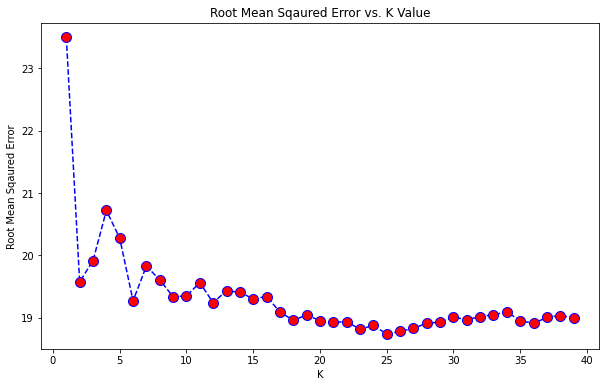

In [26]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Root Mean Sqaured Error vs. K Value')
plt.xlabel('K')
plt.ylabel('Root Mean Sqaured Error')

In [27]:
knn = KNeighborsRegressor(n_neighbors = 25)
knn.fit(X_train_standard, y_train)
predictions_standard = knn.predict(X_test_standard)

In [28]:
mse = mean_squared_error(y_test, predictions_standard)
print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {mse**0.5}")

Mean Squared Error: 351.01895999999994
Root Mean Squared Error: 18.735499993328173


In [29]:
print('R-squared: '+ "{:.2%}".format(knn.score(X_test_standard,y_test)))
print('Root Mean Squared Error: '+ "{:.2f}".format(mean_squared_error(y_test,predictions_standard,squared=False)))

R-squared: 79.67%
Root Mean Squared Error: 18.74


In [30]:
model_performance.loc['kNN standardisation'] = [knn.score(X_test_standard,y_test), mean_squared_error(y_test,predictions_standard,squared=False)]

<a id='4_2'></a>
## <p style="padding: 8px;color:white; display:fill;background-color:#aaaaaa; border-radius:5px; font-size:100%"> <b>KNN min_max</b>

In [31]:
min_max = MinMaxScaler()
##fit_transform on training data
##transform on unseen test data
X_train_min_max = min_max.fit_transform(X_train)
X_test_min_max = min_max.transform(X_test)

In [32]:
knn = KNeighborsRegressor(n_neighbors = 1)
knn.fit(X_train_min_max, y_train)
predictions_min_max = knn.predict(X_test_min_max)

In [33]:
mse = mean_squared_error(y_test, predictions_min_max)
print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {mse**0.5}")

Mean Squared Error: 506.51
Root Mean Squared Error: 22.50577703613008


In [34]:
error_rate = []

# Will take some time
for i in range(1,40):
    
    knn = KNeighborsRegressor(n_neighbors=i)
    knn.fit(X_train_min_max,y_train)
    pred_i = knn.predict(X_test_min_max)
    error_rate.append(mean_squared_error(y_test,pred_i,squared=False))

print('k with min error is: ', error_rate.index(min(error_rate))+1)
print('Root Mean Sqaured Error: ', min(error_rate))

k with min error is:  8
Root Mean Sqaured Error:  18.46129820056


Text(0, 0.5, 'Root Mean Sqaured Error')

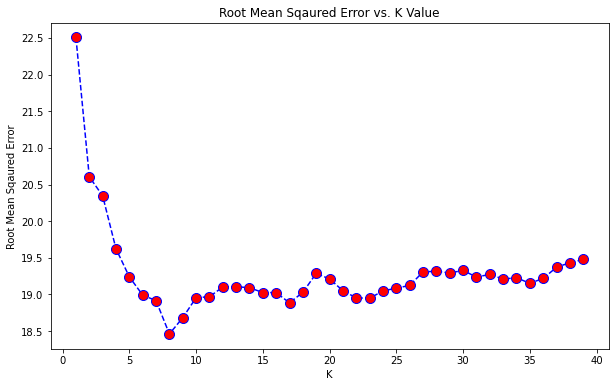

In [35]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Root Mean Sqaured Error vs. K Value')
plt.xlabel('K')
plt.ylabel('Root Mean Sqaured Error')

In [36]:
knn = KNeighborsRegressor(n_neighbors = 8)
knn.fit(X_train_min_max, y_train)
predictions_min_max = knn.predict(X_test_min_max)

In [37]:
mse = mean_squared_error(y_test, predictions_min_max)
print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {mse**0.5}")

Mean Squared Error: 340.81953125
Root Mean Squared Error: 18.46129820056


In [38]:
print('R-squared: '+ "{:.2%}".format(knn.score(X_test_min_max,y_test)))
print('Root Mean Squared Error: '+ "{:.2f}".format(mean_squared_error(y_test,predictions_min_max,squared=False)))

R-squared: 80.26%
Root Mean Squared Error: 18.46


In [39]:
model_performance.loc['kNN min_max'] = [knn.score(X_test_min_max,y_test), mean_squared_error(y_test,predictions_min_max,squared=False)]

<a id='4_2'></a>
## <p style="padding: 8px;color:white; display:fill;background-color:#aaaaaa; border-radius:5px; font-size:100%"> <b>plotted comparison for KNN standardisation vs min_max</b>

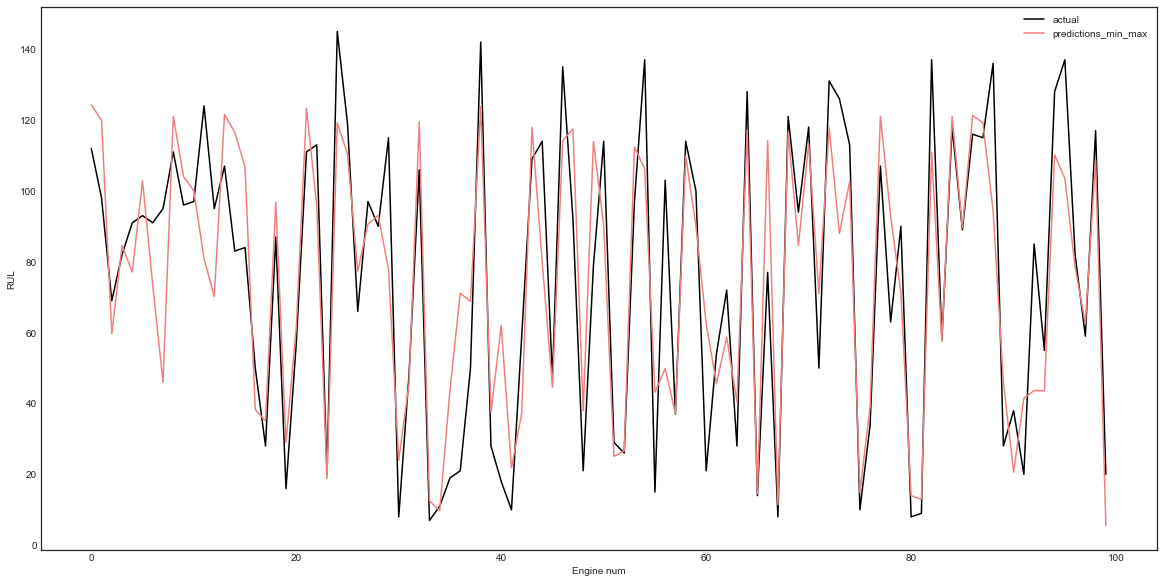

In [47]:
plt.style.use('seaborn-white')
plt.rcParams['figure.figsize']=20,10

fig,ax = plt.subplots()
plt.ylabel('RUL')
plt.xlabel('Engine num')

g = sns.lineplot(x = np.arange(0,len(x_train['engine'].unique())),
                y=y_test,
                color='black',
                label = 'actual',
                ax=ax)

f = sns.lineplot(x = np.arange(0,len(x_train['engine'].unique())),
                y=predictions_min_max,
                color='lightcoral',
                label = 'predictions_min_max',
                ax=ax)

ax.legend()


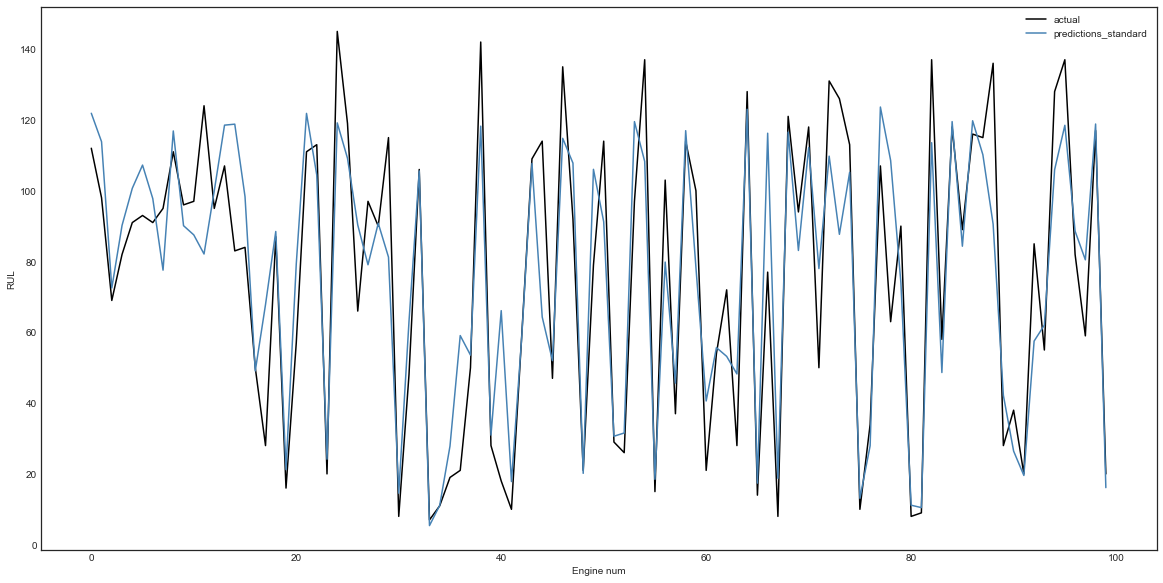

In [48]:
plt.style.use('seaborn-white')
plt.rcParams['figure.figsize']=20,10

fig,ax = plt.subplots()
plt.ylabel('RUL')
plt.xlabel('Engine num')

g = sns.lineplot(x = np.arange(0,len(x_train['engine'].unique())),
                y=y_test,
                color='black',
                label = 'actual',
                ax=ax)

f = sns.lineplot(x = np.arange(0,len(x_train['engine'].unique())),
                y=predictions_standard,
                color='steelblue',
                label = 'predictions_standard',
                ax=ax)

ax.legend()

<a id='4_2'></a>
## <p style="padding: 8px;color:white; display:fill;background-color:#aaaaaa; border-radius:5px; font-size:100%"> <b>SVM standardisation</b>

In [49]:
svr = SVR()
svr.fit(X_train_standard, y_train)

SVR()

In [50]:
predictions_standard = svr.predict(X_test_standard)

In [51]:
mse = mean_squared_error(y_test, predictions_standard)
print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {mse**0.5}")

Mean Squared Error: 367.89146527601565
Root Mean Squared Error: 19.1804970028416


In [52]:
print('R-squared: '+ "{:.2%}".format(svr.score(X_test_standard,y_test)))
print('Root Mean Squared Error: '+ "{:.2f}".format(mean_squared_error(y_test,predictions_standard,squared=False)))

R-squared: 78.70%
Root Mean Squared Error: 19.18


In [53]:
model_performance.loc['SVM standardisation'] = [svr.score(X_test_standard,y_test), mean_squared_error(y_test,predictions_standard,squared=False)]

**grid search**

In [54]:
from sklearn.model_selection import GridSearchCV
param_grid = {'C': [100], 'gamma': [0.5], 'kernel': ['rbf']}
grid = GridSearchCV(SVR(),param_grid,refit=True,verbose=3)

In [ ]:
grid.fit(X_train_standard, y_train)
grid_pred_standard = grid.predict(X_test_standard)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV 1/5] END ......C=100, gamma=0.5, kernel=rbf;, score=0.816 total time= 3.2min


In [ ]:
mse = mean_squared_error(y_test, grid_pred_standard)
print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {mse**0.5}")

In [ ]:
print('R-squared: '+ "{:.2%}".format(grid.score(X_test_standard,y_test)))
print('Root Mean Squared Error: '+ "{:.2f}".format(mean_squared_error(y_test,grid_pred_standard,squared=False)))

In [ ]:
model_performance.loc['svm standardisation with grid search'] = [grid.score(X_test_standard,y_test), mean_squared_error(y_test,grid_pred_standard,squared=False)]

<a id='4_2'></a>
## <p style="padding: 8px;color:white; display:fill;background-color:#aaaaaa; border-radius:5px; font-size:100%"> <b>SVM min_max</b>

In [ ]:
svr = SVR()
svr.fit(X_train_min_max, y_train)

In [ ]:
predictions_min_max = svr.predict(X_test_min_max)

In [ ]:
mse = mean_squared_error(y_test, predictions_min_max)
print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {mse**0.5}")

In [ ]:
model_performance.loc['svm min_max'] = [svr.score(X_test_min_max,y_test), mean_squared_error(y_test,predictions_min_max,squared=False)]

In [ ]:
from sklearn.model_selection import GridSearchCV
param_grid = {'C': [100], 'gamma': [0.5], 'kernel': ['rbf']}
grid = GridSearchCV(SVR(),param_grid,refit=True,verbose=3)

In [ ]:
grid.fit(X_train_min_max, y_train)
grid_pred_min_max = grid.predict(X_test_min_max)

In [ ]:
mse = mean_squared_error(y_test, grid_pred_min_max)
print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {mse**0.5}")

In [ ]:
print('R-squared: '+ "{:.2%}".format(grid.score(X_test_min_max,y_test)))
print('Root Mean Squared Error: '+ "{:.2f}".format(mean_squared_error(y_test,grid_pred_min_max,squared=False)))

In [ ]:
model_performance.loc['svm min_max with grid search'] = [grid.score(X_test_min_max,y_test), mean_squared_error(y_test,grid_pred_min_max,squared=False)]

In [ ]:
model_performance.style.background_gradient(cmap='RdYlBu_r').format({'R2': '{:.2%}',
                                                                     'RMSE': '{:.2f}'})